# Vechile Price Prediction

## Objective:
 Build a system that can predict the prices for vehicles using data on Vehicle specifications,
 make, etc. Explore the data to understand the features and figure out an approach.

---

## 1. Problem Statement
The task is to do EDA on dataset and build a model to predict Vechile Price based on the features provided. The challenge is to create a model that can accurately predict the outcome.

---

## 2. Data Pre-Processing

### 2.1 Data Inspection and Summary Statistics
- **Load the Dataset:** Import the dataset and review its basic structure, including column names, data types, and a few initial records.
- **Generate Summary Statistics:** Calculate key statistics (mean, median, min, max, standard deviation, etc.) to understand the primary characteristics of each column.
- Changing column names and data types

### 2.2 Data Cleaning and Feature Engineering
- **Missing Values:** Check and handle missing values if present.
- **Duplicate Values:** Check duplicate values and handle if present.


### 2.3 Outlier Treatment
- **Outlier Detection:** Identify outliers in features  box plots or Z-scores and apply treatment if necessary.

---

## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis
- **Numerical Data:** Visualize distributions with histograms and box plots.
- **Categorical Data:** Use bar charts to observe the distribution of the outcome variable.

### 3.2 Bivariate Analysis
- Create scatter plots to observe relationships between numerical features.
- Use box plots to explore how numerical features differ based on the outcome variable.

### 3.3 Multivariate Analysis
- Generate a heatmap of the correlation matrix to identify potential relationships.

---

## 4. Model Building

### 4.1 Encoding Categorical Variables:
- Convert the Categorical columns to binary format 
### 4.2 Feature Engineering 
 - This step involves transforming raw data into meaningful features and outcome
### 4.3 Model Training
- Split the dataset into training and testing sets.
- Scalling the data
- Use a Linear Regression to train the model on the training data.
- Model Evaluation
- Visualize the result

### 5. Advanced Modeling: 
- Experiment with more complex models like RandomForest and xgboost  to improve predictions.

### Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [5]:
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

### Load the Dataset¶

In [7]:
data = pd.read_csv('C://Users//PC//Downloads//Projects-20240722T093004Z-001//Projects//Vehicle Price Prediction//dataset.csv')

In [8]:
data.head() # First  rows

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [9]:
data.tail() # Last records 

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive
1001,2024 Chevrolet Silverado 2500 WT,01u 2024 Chevrolet Silverado 2500HD Work Truck...,Chevrolet,Silverado 2500,2024,48995.0,"8 gasoline direct injection, variable valve co...",8.0,Gasoline,31.0,Automatic,WT,Pickup Truck,4.0,Wheatland Yellow,Jet Black,Rear-wheel Drive


### 2.Data Preprocessing¶

#### 2.1 Data Inspection and Summary Statistics

In [12]:
data.shape # Rows and columns

(1002, 17)

In [13]:
data.ndim # Dimention of data

2

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [15]:
data.describe() # Description of data

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


 Price , cylinder,mileage columns have min value 0 which is not feasible. These records will be handled during handling of outlers

In [17]:
data.columns



Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [18]:
# Checking unique values in each column

print("# unique values in name:", data['name'].nunique())
print("# unique values in description:", data['description'].nunique())
print("# unique values in make:", data['make'].nunique())
print("# unique values in model:", data['model'].nunique())
print("# unique values in year:", data['year'].nunique())
print("# unique values in price:", data['price'].nunique())
print("# unique values in engine:", data['engine'].nunique())
print("# unique values in cylindersfuel:", data['cylinders'].nunique())
print("# unique values in fuel:", data['fuel'].nunique())
print("# unique values in mileage:", data['mileage'].nunique())
print("# unique values in trim:", data['trim'].nunique())
print("# unique values in body:", data['body'].nunique())
print("# unique values in doors:", data['doors'].nunique())
print("# unique values in exterior_color:", data['exterior_color'].nunique())
print("# unique values in interior_color:", data['interior_color'].nunique())
print("# unique values in drivetraindrivetrain:", data['drivetrain'].nunique())

# unique values in name: 358
# unique values in description: 761
# unique values in make: 28
# unique values in model: 153
# unique values in year: 3
# unique values in price: 859
# unique values in engine: 100
# unique values in cylindersfuel: 5
# unique values in fuel: 7
# unique values in mileage: 95
# unique values in trim: 197
# unique values in body: 8
# unique values in doors: 4
# unique values in exterior_color: 263
# unique values in interior_color: 91
# unique values in drivetraindrivetrain: 4


#### 2.2 Data Cleaning¶

##### Duplicate Values

In [21]:
data.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [22]:
data = data.dropna() # Droppping null values

In [23]:
data.isnull().sum() # No Null values

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

##### Duplicate values

In [25]:
data.duplicated().sum()

16

In [26]:
data = data.drop_duplicates() # Dropping duplicates

In [27]:
data.duplicated().sum() # NO duplicate values

0

### 2.3 Outlier Treatment¶

In [29]:
data.dtypes

name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

<Axes: ylabel='mileage'>

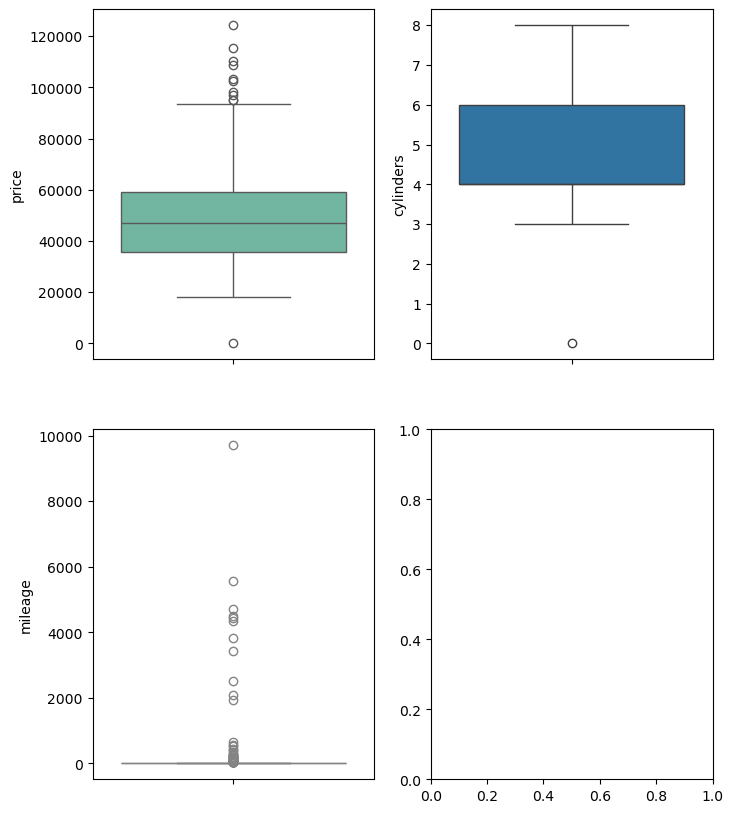

In [30]:
fig,axis = plt.subplots(2,2,figsize=(8,10))

sns.boxplot(ax = axis[0][0], data=data['price'],palette='Set2')
sns.boxplot(ax = axis[0][1], data=data['cylinders'])
sns.boxplot(ax = axis[1][0], data=data['mileage'],palette='coolwarm')

In [31]:
# Handling Outliers

def outlier(x):

    q1 = data[x].quantile(0.25)
    q3 = data[x].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    median = np.median(data[x])
    for i in data[x]:
        if i <lower or i>upper:
            data[x]=data[x].replace({i:median})

outlier('price')
outlier('cylinders')
outlier('mileage')

<Axes: ylabel='mileage'>

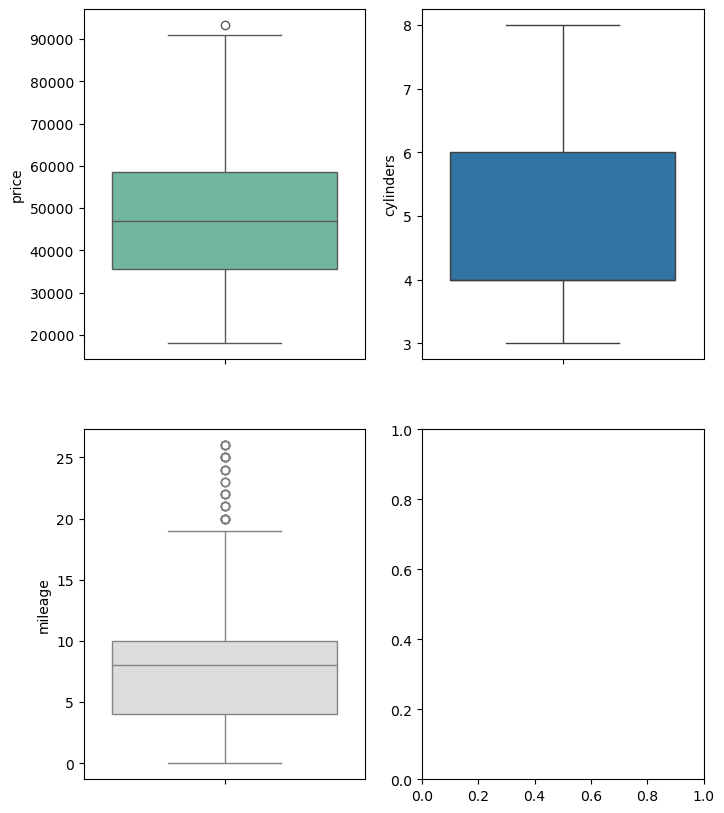

In [32]:
fig,axis = plt.subplots(2,2,figsize=(8,10))

sns.boxplot(ax = axis[0][0], data=data['price'],palette='Set2')
sns.boxplot(ax = axis[0][1], data=data['cylinders'])
sns.boxplot(ax = axis[1][0], data=data['mileage'],palette='coolwarm')

### 3. EDA
### 3.1 Univariate Analysis  
Visualize individual variables to understand their distribution (e.g., histograms for numerical data, bar charts for categorical data).  


### 3.2 Bivariate and Multivariate Analysis  
Explore relationships between variables by visualizing pairs of variables or groups of variables (e.g., scatter plots, heatmaps).  



#### 3.1 Univariate Analysis

Text(0.5, 1.0, 'Distribution of Vehicle Prices')

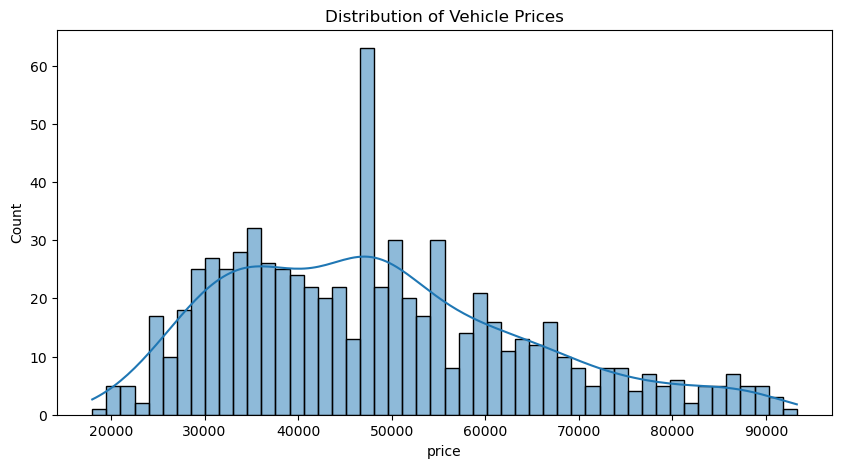

In [35]:

plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')


Text(0.5, 1.0, 'Vehicle Count by Year')

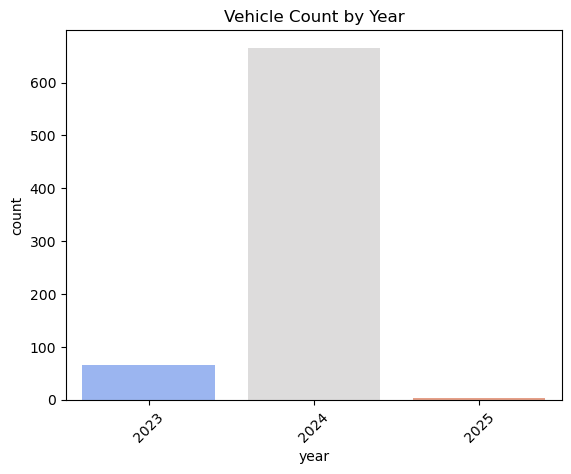

In [36]:
sns.countplot(data=data, x='year',palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Vehicle Count by Year')


Text(0.5, 1.0, 'Vehicle Body Type Distribution')

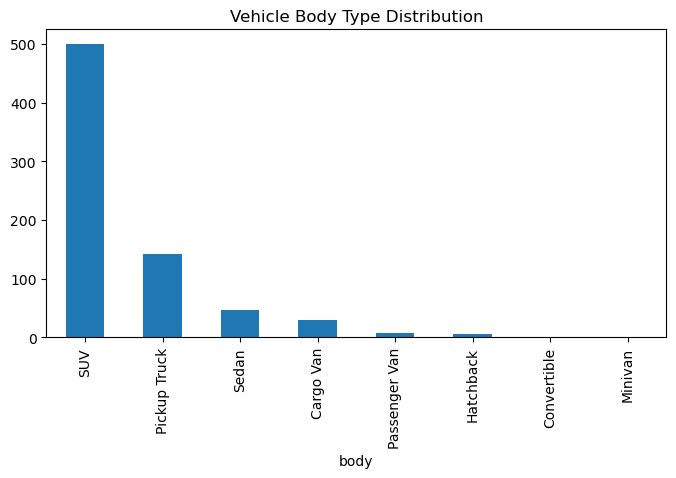

In [37]:
data['body'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.title('Vehicle Body Type Distribution')


Text(0.5, 0, 'Mileage')

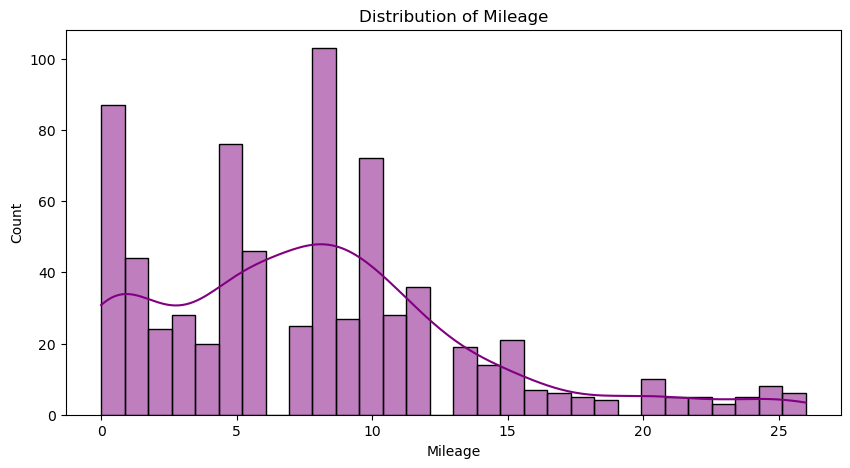

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(data['mileage'], bins=30, kde=True, color='purple')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')


Text(0.5, 1.0, 'Count of Vehicles by Cylinder Number')

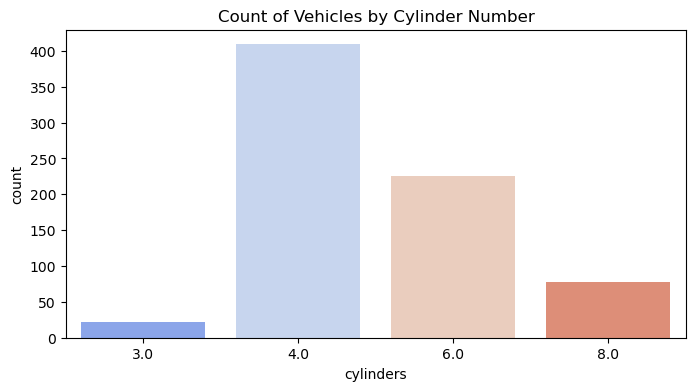

In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='cylinders', palette='coolwarm')
plt.title('Count of Vehicles by Cylinder Number')


Text(0.5, 1.0, 'Distribution of Number of Doors')

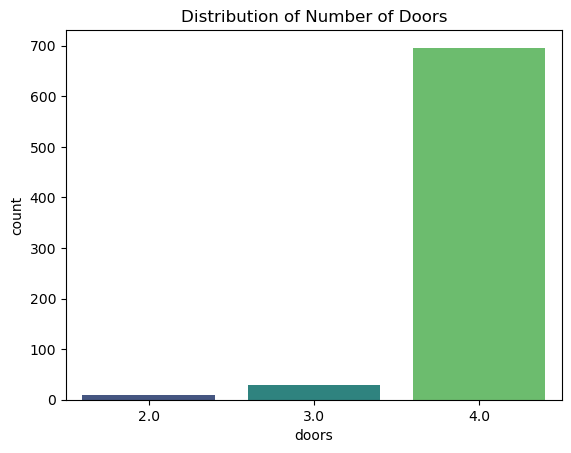

In [40]:
sns.countplot(data=data, x='doors', palette='viridis')
plt.title('Distribution of Number of Doors')


#### 3.2 Bivariate analysis

Text(0.5, 1.0, 'Price by Year')

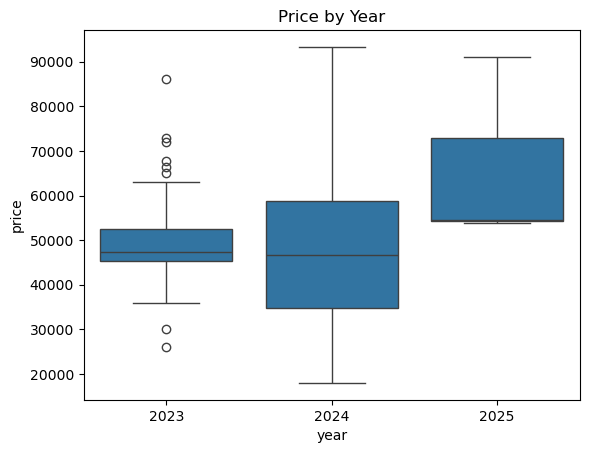

In [42]:
sns.boxplot(data=data, x='year', y='price')
plt.title('Price by Year')


Text(0.5, 1.0, 'Price by Engine Type')

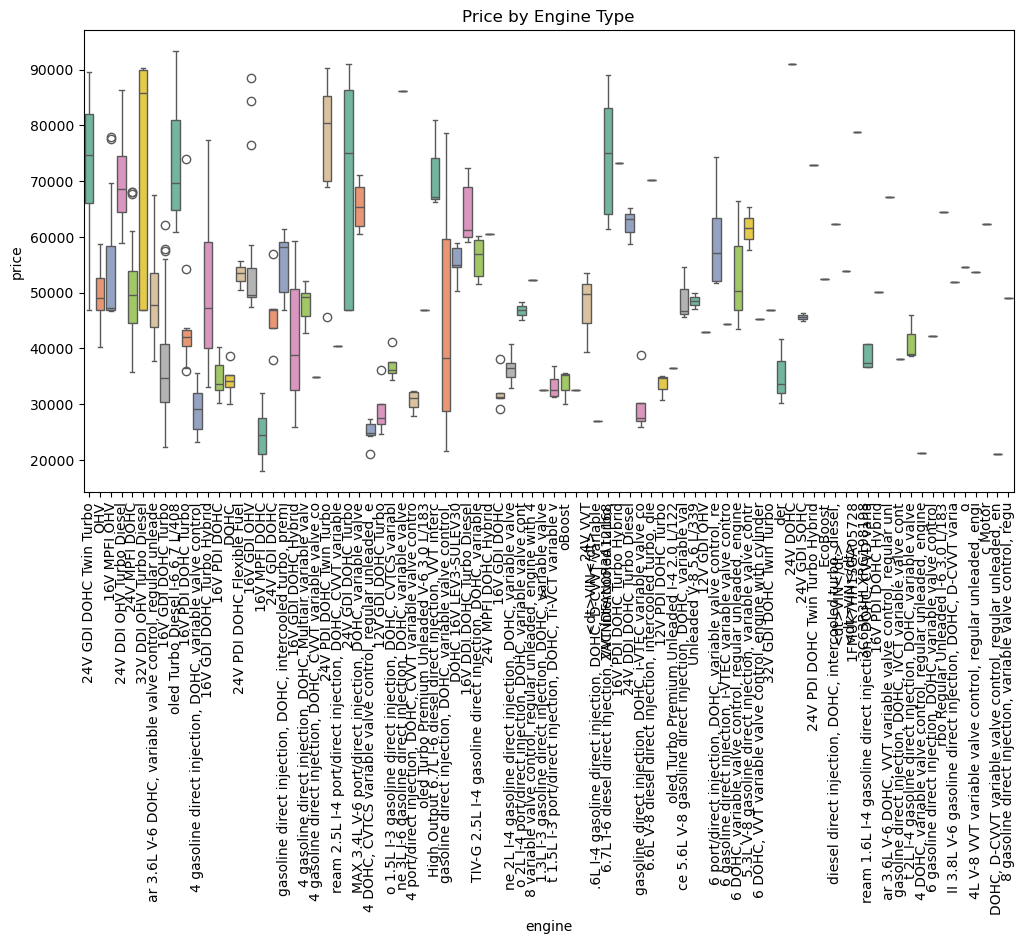

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='engine', y='price',palette='Set2')
plt.xticks(rotation=90)
plt.title('Price by Engine Type')


Text(0.5, 1.0, 'Fuel Type Count')

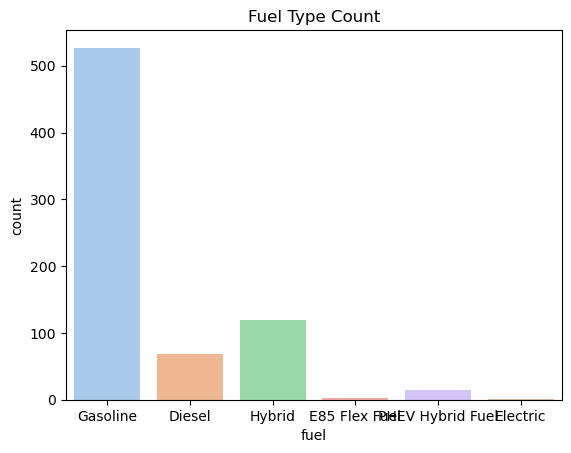

In [44]:
sns.countplot(data=data, x='fuel',palette='pastel')
plt.title('Fuel Type Count')


Text(0.5, 1.0, 'Price by Number of Cylinders')

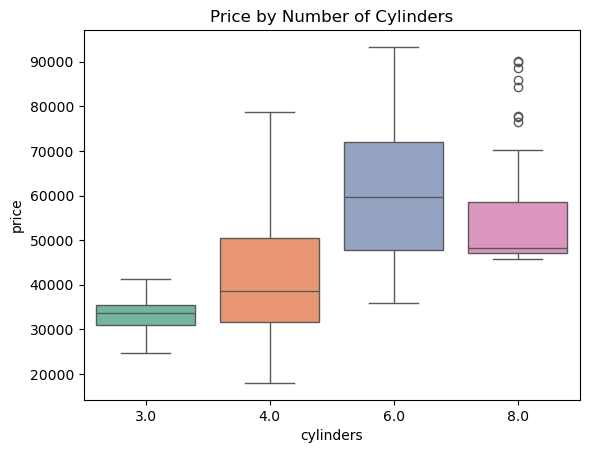

In [45]:
sns.boxplot(data=data, x='cylinders', y='price', palette='Set2')
plt.title('Price by Number of Cylinders')


Text(0.5, 1.0, 'Price by Transmission Type')

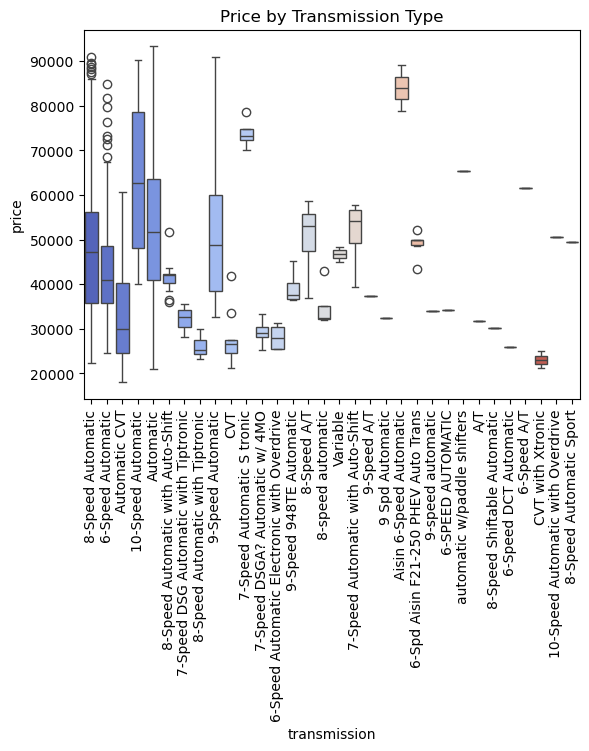

In [46]:
sns.boxplot(data=data, x='transmission', y='price',palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price by Transmission Type')


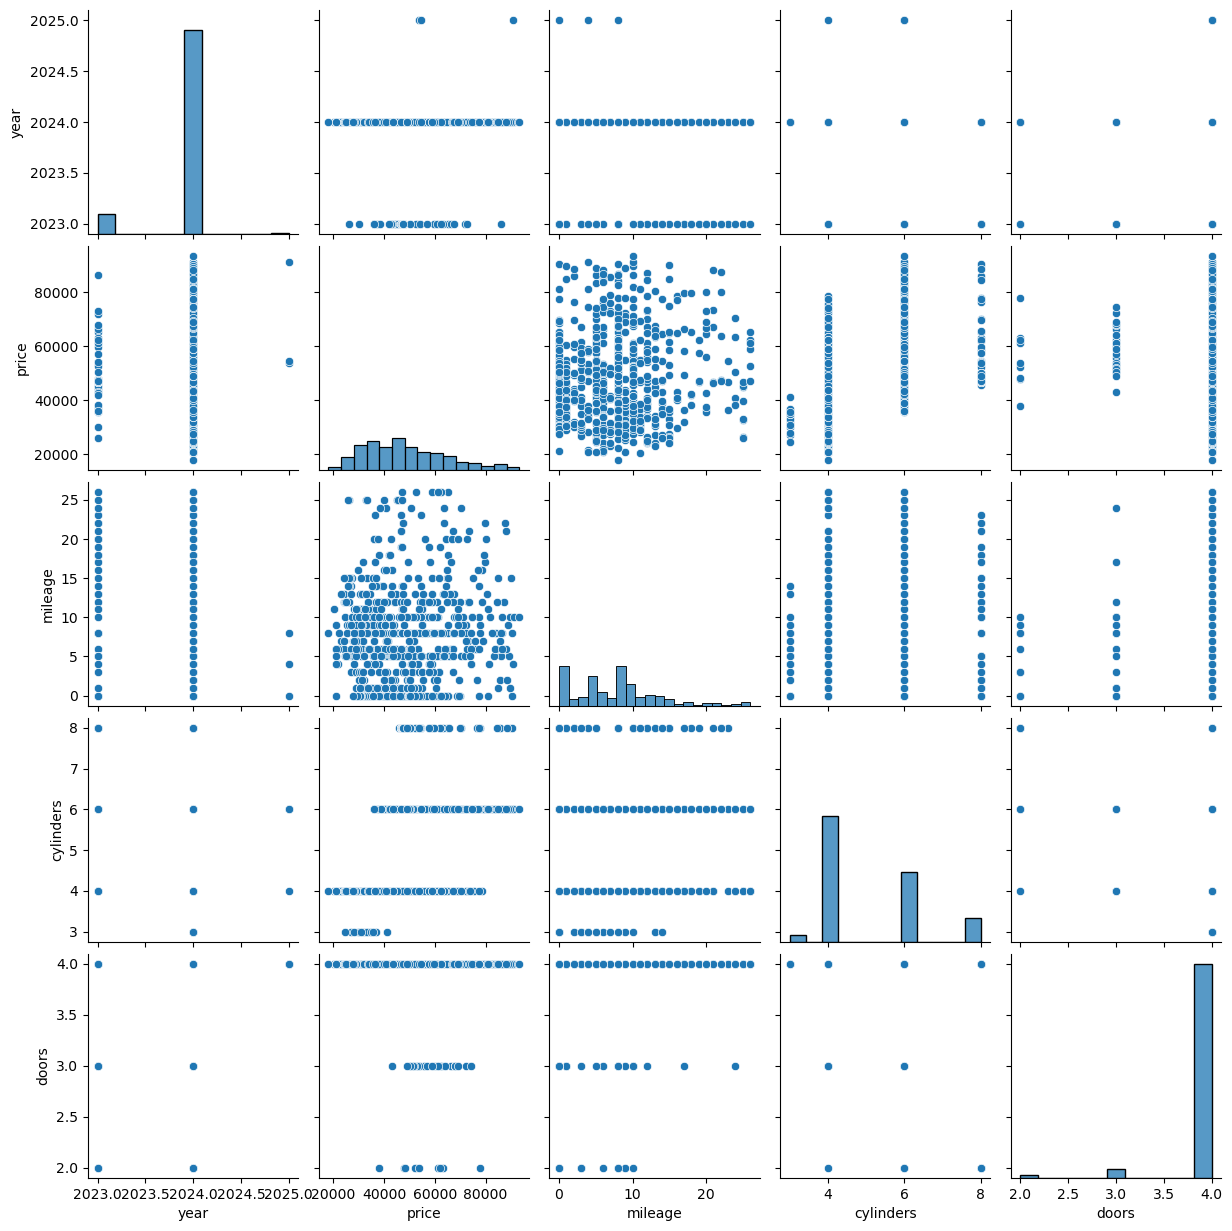

In [47]:
num_features = ['year', 'price', 'mileage', 'cylinders', 'doors']

# Pairplot for correlations
sns.pairplot(data[num_features])



### 3.3 Multivariant Analysis

Text(0.5, 1.0, 'Correlation Matrix')

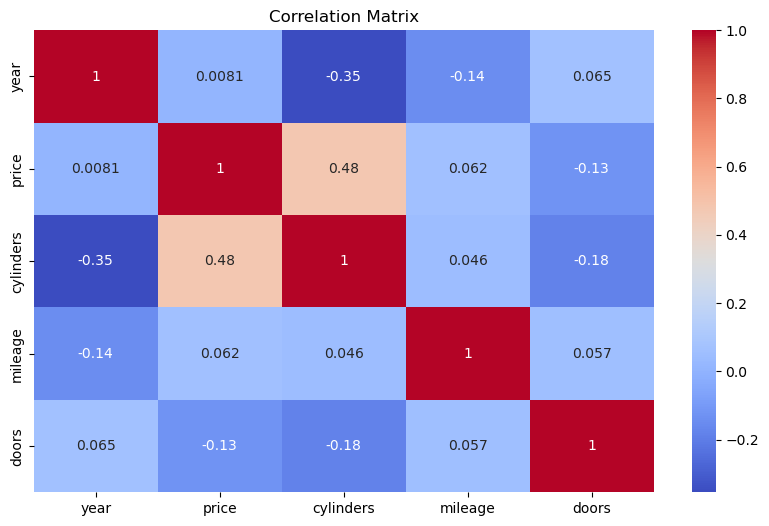

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


Text(0.5, 1.0, 'Price vs Mileage (by Drivetrain)')

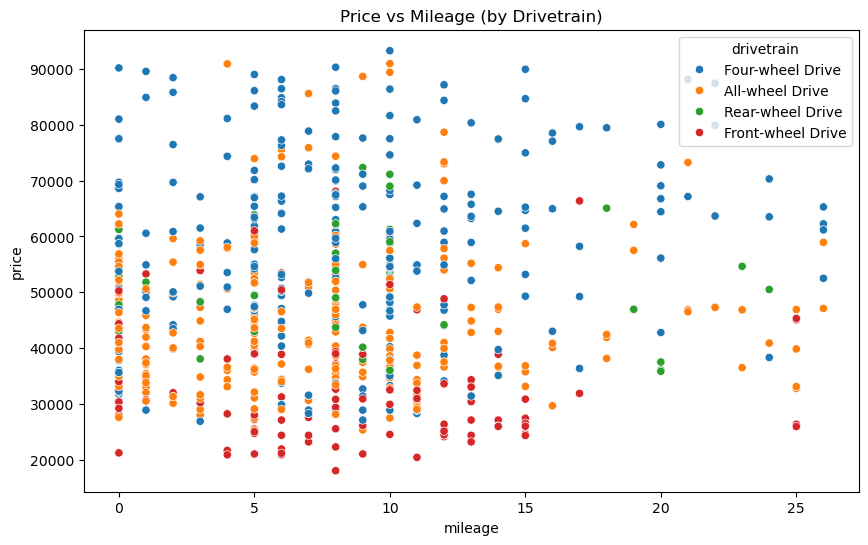

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='mileage', y='price', hue='drivetrain')
plt.title('Price vs Mileage (by Drivetrain)')


Text(0.5, 1.0, 'Top 10 Makes with Highest Average Price')

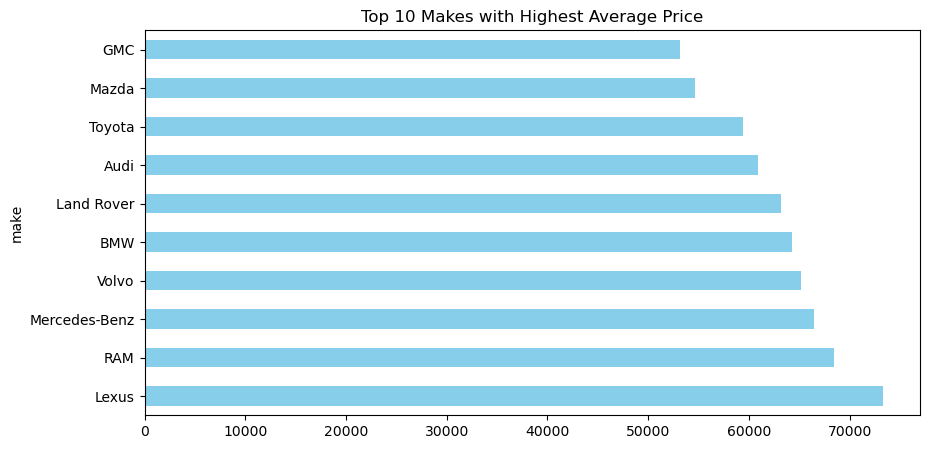

In [51]:
avg_price_by_make = data.groupby('make')['price'].mean().sort_values(ascending=False).head(10)
avg_price_by_make.plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Makes with Highest Average Price')


#### Grouped rare categories in model, engine, and trim features into 'Other' to reduce cardinality and improve model generalization.

In [53]:
model_counts = data['model'].value_counts()
common_models = model_counts[model_counts > 5].index
data['model'] = data['model'].apply(lambda x: x if x in common_models else 'Other')


engine_counts = data['engine'].value_counts()
common_engine = engine_counts[engine_counts > 5].index

# Replace engine models with 'Other'
data['engine'] = data['engine'].apply(lambda x: x if x in common_engine else 'Other')


trim_counts = data['trim'].value_counts()
common_trim = trim_counts[trim_counts >3].index

# Replace rare Trim with 'Other'
data['trim'] = data['trim'].apply(lambda x: x if x in common_trim else 'Other')


### 4. Model Building

### 4.1 Encoding Categorical columns

In [56]:
data = pd.get_dummies(data,columns=['make','fuel','body','doors','drivetrain','model','engine','trim'],drop_first=True)
data.head()

,name,description,year,price,cylinders,mileage,transmission,exterior_color,interior_color,make_BMW,...,trim_Sahara,trim_Series II,trim_Series III,trim_Sport,trim_Sport S,trim_Tradesman,trim_Tradesman Crew Cab 4x4 8&#39; Box,trim_Trailhawk,trim_XLT,trim_xDrive40i
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",2024,74600.0,6.0,10.0,8-Speed Automatic,White,Global Black,False,...,False,True,False,False,False,False,False,False,False,False
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,2024,50170.0,6.0,1.0,8-Speed Automatic,Metallic,Global Black,False,...,False,False,False,False,False,False,False,False,False,False
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,2023,46835.0,8.0,8.0,8-Speed Automatic,White Knuckle Clearcoat,Black,False,...,False,False,False,False,False,False,False,False,False,False
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,2024,81663.0,6.0,10.0,6-Speed Automatic,Silver,Black,False,...,False,False,False,False,False,False,False,False,False,False
5,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,2024,46000.0,6.0,8.0,Automatic CVT,White,Gray,False,...,False,False,False,False,False,False,False,False,False,False


#### 4.2 Feature Engineering

In [58]:
X = data.drop(columns=['name','description','price','exterior_color','interior_color','transmission'])
y = data['price']




#### 4.3 Model Training

In [60]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the data

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [61]:
# Using Linear Regression to predict profit

model = LinearRegression()

# Training thw model
model.fit(X_train_normalized, y_train) 

# Make Prediction
y_pred = model.predict(X_test_normalized)


In [62]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root  Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root  Squared Error: 5720.5809941552125
R-squared: 0.8814003113749823


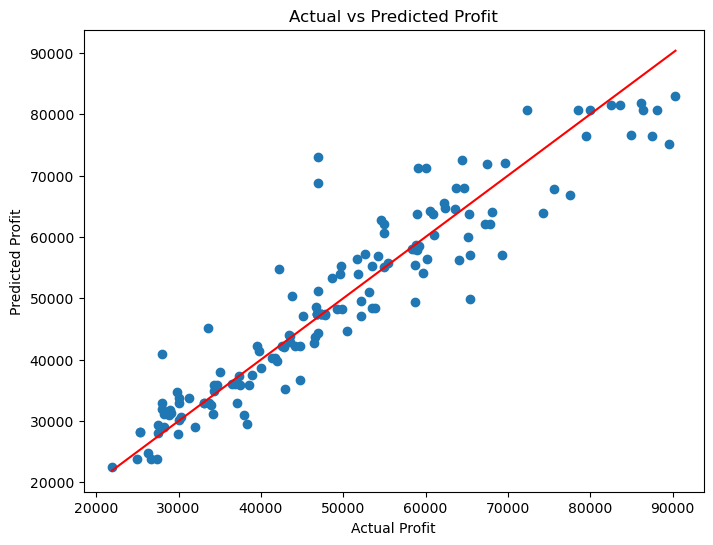

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

### 5. Advance Model

In [65]:
# Random Forrest 

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_log = rf.predict(X_test)


In [66]:
mse = mean_squared_error(y_test, y_pred_log)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_log)

print(f"Root  Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root  Squared Error: 5692.849758133807
R-squared: 0.8825473781654893


In [67]:
# XGBoost

from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [68]:
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Root  Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root  Squared Error: 5839.966089939761
R-squared: 0.8763984486309568


### Conclusion

To identify the best-performing algorithm for vehicle price prediction, we evaluated three models: Linear Regression, Random Forest, and XGBoost. Among 

them, the Random Forest model delivered the most accurate results, achieving the lowest Root Mean Squared Error (RMSE) of 5692.85 and the highest R-

squared value of 0.8825. This indicates that the model captures approximately 88.25% of the variance in vehicle prices, making it the most reliable 

choice. While Linear Regression and XGBoost also performed well, Random Forest showed a slightly better balance between prediction accuracy and variance explanation.